In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# path = '/content/drive/My Drive/ready_to_train_0 to120000 reviews.csv'
# path = '/content/drive/My Drive/ready_to_train_0 to120000 reviews with tf-idf adv and adj and intention.csv'
path = '/content/drive/My Drive/ready_to_train_0 to120000 reviews with tf-idf adv and adj and intention without features name.csv'

data = pd.read_csv(path)

In [4]:
data.shape

(122255, 35)

In [5]:
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,output
0,236,4,408,10.92,28.6,0.425000,0.425000,56,6,0,0,0,0,2,0,0,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.85,0.00,0.00,3,3,4.221928,0,0,0,1,0,0
1,138,4,356,26.48,24.7,0.804167,0.276250,42,6,0,0,0,0,4,0,2,0.00,0.63,0.00,0.00,0.00,0.00,0.35,0.00,0.00,0.00,7,6,4.620335,0,0,0,0,1,0
2,87,2,396,26.15,29.0,0.446528,-0.039583,55,6,0,0,0,0,0,4,-1,0.00,0.06,0.14,0.00,0.78,0.00,0.00,0.00,0.00,0.00,10,7,6.198820,0,0,0,1,0,0
3,16,5,417,19.38,27.5,0.498179,0.281513,56,1,0,0,0,0,0,0,1,0.00,0.03,0.00,0.00,0.90,0.00,0.05,0.00,0.00,0.00,10,1,5.531627,0,0,0,0,1,0
4,236,4,408,10.92,28.6,0.425000,0.425000,56,6,0,0,0,0,2,0,0,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.85,0.00,0.00,3,3,4.221928,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122250,0,5,16,93.81,0.9,0.625000,0.306250,1,0,0,0,0,0,0,0,2,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,0.05,0.05,2,0,1.569345,0,0,0,0,1,0
122251,0,5,17,93.81,0.9,0.675000,0.600000,2,0,0,0,0,0,0,0,2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.55,1,0,1.655482,0,0,0,0,1,1
122252,0,5,11,77.91,2.9,0.600000,0.300000,2,0,0,0,0,0,0,0,1,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0,0,1.400601,0,0,0,0,1,0
122253,0,5,25,100.24,0.5,0.750000,0.800000,3,0,0,0,0,0,0,0,2,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1,1,2.151667,0,0,0,0,1,0


In [6]:
#sentence count
data=data.drop(data.columns[6], axis=1)

In [7]:
# #Loading the dataset
# x = load_boston()
# data = pd.DataFrame(x.data, columns = x.feature_names)
# data["MEDV"] = x.target
# X = data.drop("MEDV",1)   #Feature Matrix
# y = data["MEDV"]          #Target Variable
# data.head()

In [8]:
# X = data.drop('response', axis=1)
# y = data['response']

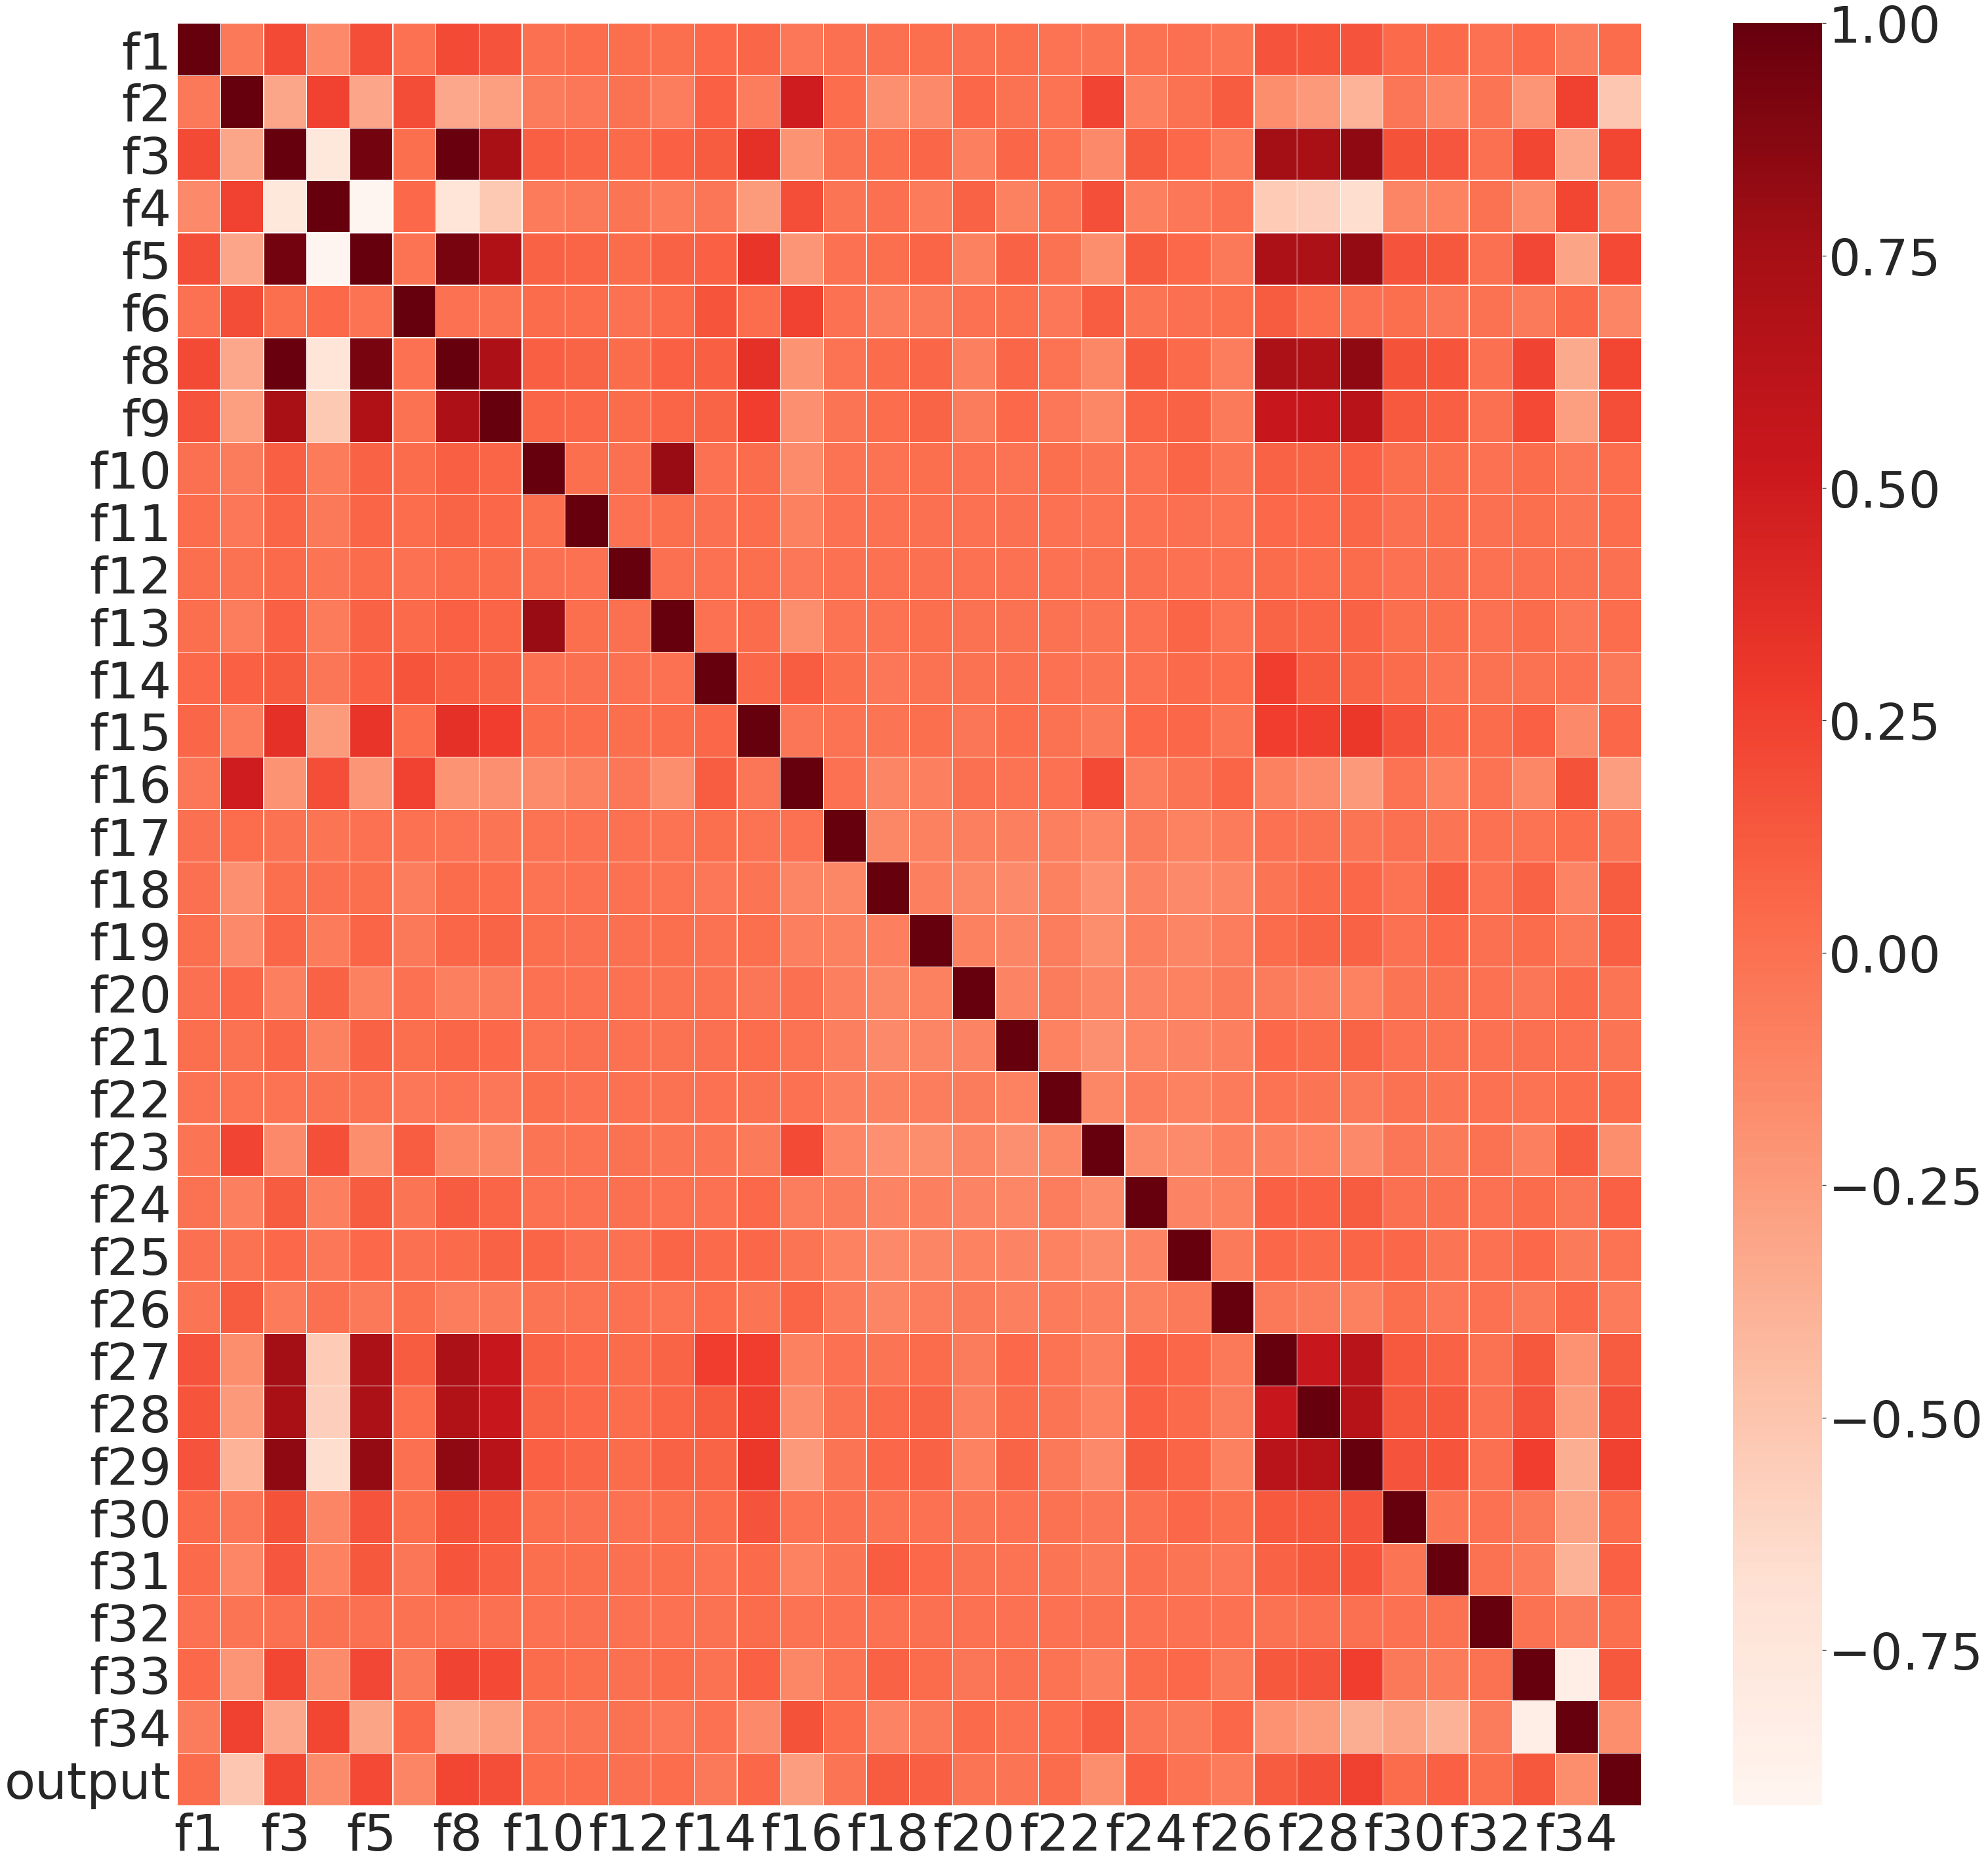

In [13]:
#Using Pearson Correlation
# plt.figure(figsize=(12,10))
sns.set(font_scale=7)
plt.figure(figsize=(50,50))

cor = data.corr()
# sns.heatmap(cor, annot=True,linewidths=.3)
sns.heatmap(cor, linewidths=.3,cmap=plt.cm.Reds)

path3 = '/content/drive/My Drive/thesis-part1-correlation for 122000 reviews.png'

plt.savefig(path3)
plt.show()

In [10]:
#Correlation with output variable
cor_target = abs(cor["output"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.1]
relevant_features

f2        0.511377
f3        0.221355
f4        0.158066
f5        0.209872
f6        0.116425
f8        0.228256
f9        0.190531
f16       0.261676
f18       0.123612
f23       0.169552
f27       0.121747
f28       0.176383
f29       0.257098
f33       0.133184
f34       0.169090
output    1.000000
Name: output, dtype: float64